In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [2]:
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')#.groupby("month_number")

games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

games_df = games_df.loc[games_df['gameday']<='2024-03-01']

In [3]:
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df['home_acclimitisation_advantage'] = (games_df['homeAcclimatisedTemp'] - games_df['temp'])-(games_df['awayAcclimatisedTemp']-games_df['temp'])

games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -50), 'home_acclimitisation_category'] = 5
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -40), 'home_acclimitisation_category'] = 4
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -30), 'home_acclimitisation_category'] = 3
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -20), 'home_acclimitisation_category'] = 2
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -10), 'home_acclimitisation_category'] = 1

games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 60) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -60), 'away_acclimitisation_category'] = 6
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -50), 'away_acclimitisation_category'] = 5
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -40), 'away_acclimitisation_category'] = 4
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -30), 'away_acclimitisation_category'] = 3
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -20), 'away_acclimitisation_category'] = 2
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -10), 'away_acclimitisation_category'] = 1

games_df['acclimitisation_category_difference'] = games_df['away_acclimitisation_category'] - games_df['home_acclimitisation_category']
games_df[['home_acclimitisation_advantage', 'homeAcclimatisedTemp', 'awayAcclimatisedTemp', 'temp']]

df = games_df

In [4]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(df.iloc[:, 26:40], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0.503437,0.519981,9,73.707500,63.875000,0.000000,0.0,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,12.0,0.462116,0.570173,9,61.655000,67.895000,-6.240000,2.0,2.0,0.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,12.0,0.361333,0.627238,9,65.307826,65.307826,0.000000,2.0,2.0,0.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,10.0,0.614770,0.357639,9,61.655000,69.197391,-7.542391,1.0,1.0,0.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,0.601023,0.491049,9,66.192500,63.560000,0.000000,0.0,0.0,0.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,8.0,0.387948,0.482177,9,79.760000,69.197391,10.562609,1.0,1.0,0.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,0.569373,0.477382,9,70.212500,75.972500,0.000000,0.0,0.0,0.0
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,5.0,0.423753,0.697570,9,70.347500,66.837500,3.510000,1.0,1.0,0.0
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,3.0,0.578804,0.439898,9,70.347500,90.207500,-19.860000,1.0,2.0,1.0
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0.573450,0.379236,9,59.240000,60.185000,0.000000,0.0,0.0,0.0


In [5]:
roofMap = {"dome":1, "outdoors":0, "closed":1, "open":0}
df['roof']= df['roof'].map(roofMap)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

In [6]:
df.to_csv('dataframe.csv')

In [7]:
df1 = df.iloc[6460]
df1

away_team                                    LAC
away_score                                  28.0
home_team                                    MIN
home_score                                  24.0
location                                    Home
home_winning_margin                         -4.0
total                                       52.0
overtime                                     0.0
away_rest                                      7
home_rest                                     10
away_moneyline                            -110.0
home_moneyline                            -110.0
spread_line                                  1.0
away_spread_odds                          -115.0
home_spread_odds                          -105.0
total_line                                  54.0
under_odds                                -110.0
over_odds                                 -110.0
div_game                                       0
indoor_game                                    1
temp                

In [8]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,20.873993,23.234566,2.360573,44.108559,0.061288,7.472413,7.522070,59.315240,-92.468983,2.313451,...,53.143450,-0.193075,1.063823,1.342827,0.279004,0.565016,0.483895,0.649866,0.474650,0.047122
std,10.065753,10.316932,14.616551,14.208215,0.239876,1.976951,2.098159,244.880739,281.343748,5.962331,...,14.482275,9.967743,0.882904,1.195245,0.795680,0.495792,0.499778,13.463998,0.499394,13.263428
min,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,17.225600,-36.007200,0.000000,0.000000,-3.000000,0.000000,0.000000,-39.500000,0.000000,-52.000000
25%,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-104.000000,-210.000000,-3.000000,...,42.582500,-4.383499,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-8.500000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,53.652500,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
75%,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,187.750000,0.000000,6.500000,...,64.737500,4.042500,2.000000,2.000000,1.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,90.207500,35.184000,5.000000,6.000000,3.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [9]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6706,6706,6706
unique,35,35,2
top,BAL,NE,Home
freq,222,231,6627


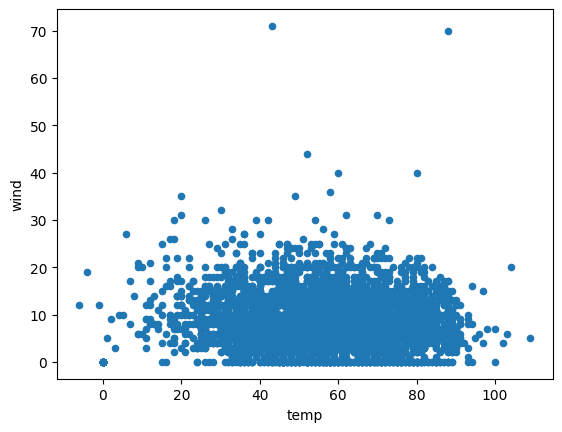

In [10]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [11]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,63.8750,0.0,0.0,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,63.5600,0.0,0.0,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,75.9725,0.0,0.0,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,60.1850,0.0,0.0,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,69.2600,0.0,0.0,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,7,...,28.5440,0.0,0.0,0.0,0.0,1,1,14.0,1,33.5
6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,7,...,21.0200,0.0,0.0,0.0,0.0,0,1,27.5,0,-23.0
6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,7,...,46.0472,0.0,0.0,0.0,0.0,1,0,-5.5,0,-2.5
6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,7,...,50.8064,0.0,0.0,0.0,0.0,1,1,4.5,1,2.0


In [12]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,67.895000,-6.240000,2.0,2.0,0.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,65.307826,0.000000,2.0,2.0,0.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,69.197391,-7.542391,1.0,1.0,0.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,69.197391,10.562609,1.0,1.0,0.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,66.837500,3.510000,1.0,1.0,0.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,14,...,51.648800,-17.733600,1.0,3.0,2.0,1,0,0.0,1,14.0
6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,13,...,21.020000,25.027200,2.0,4.0,2.0,1,0,-5.5,0,-7.5
6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,6,...,31.020800,-9.806400,1.0,1.0,0.0,0,1,5.5,0,-5.5
6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,8,...,31.020800,2.894400,2.0,2.0,0.0,0,0,-17.0,0,-11.5


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [14]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [15]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [16]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\2317046437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [17]:
# removed temp and wind columns as they are irrelant for indoor games
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage','home_acclimitisation_category','away_acclimitisation_category','acclimitisation_category_difference']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage','home_acclimitisation_category','away_acclimitisation_category','acclimitisation_category_difference']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_20424\2820346235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage','home_acclimitisation_category','away_acclimitisation_category','acclimitisation_category_difference']] = \


In [18]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [19]:
from sklearn.model_selection import train_test_split

outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_train, outdoor_with_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)
outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_train, outdoor_without_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage','home_acclimitisation_category','away_acclimitisation_category','acclimitisation_category_difference'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)

In [20]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
3108,11,5,0,0.124212,-0.264164,-0.214139,-0.224350,-1.566342,1.391273,-1.576192,...,0.770849,30.920000,26.3150,0.0,0.0,0.0,0.0,0.889731,1.039551,0.850733
2626,4,15,0,-0.296151,-0.264164,-0.214139,-0.224350,-0.770045,0.782488,-0.567404,...,0.770849,44.826957,48.7025,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.065044
1186,2,20,0,0.614634,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.693580,...,0.424244,44.670435,47.8850,0.0,0.0,0.0,0.0,0.889731,1.039551,0.354687
3249,0,13,0,1.525419,-0.264164,-0.214139,-0.224350,0.470022,-0.367854,0.189186,...,0.077639,47.525000,78.7400,0.0,0.0,0.0,0.0,0.889731,1.039551,1.575722
3719,20,5,0,0.544574,-0.264164,-0.214139,-0.224350,0.532233,-0.435082,0.273252,...,-0.268965,60.185000,63.8750,0.0,0.0,0.0,0.0,0.889731,1.039551,0.469159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,1,13,0,1.315238,-0.264164,-0.214139,-0.224350,0.391222,-0.263278,0.105121,...,-0.268965,63.875000,73.7075,0.0,0.0,0.0,0.0,0.889731,1.039551,1.384936
2293,10,13,0,2.085903,-0.264164,1.290078,-0.224350,0.673244,-0.554598,0.525449,...,0.770849,22.130000,30.9200,0.0,0.0,0.0,0.0,0.889731,1.039551,2.033611
4484,11,0,0,1.945782,-0.264164,-0.214139,-0.224350,0.677391,-0.584477,0.609515,...,0.770849,54.522500,26.3150,0.0,0.0,0.0,0.0,0.889731,1.039551,1.842824
1585,32,13,0,-0.926694,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.609515,...,-0.268965,63.875000,79.7600,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.286079


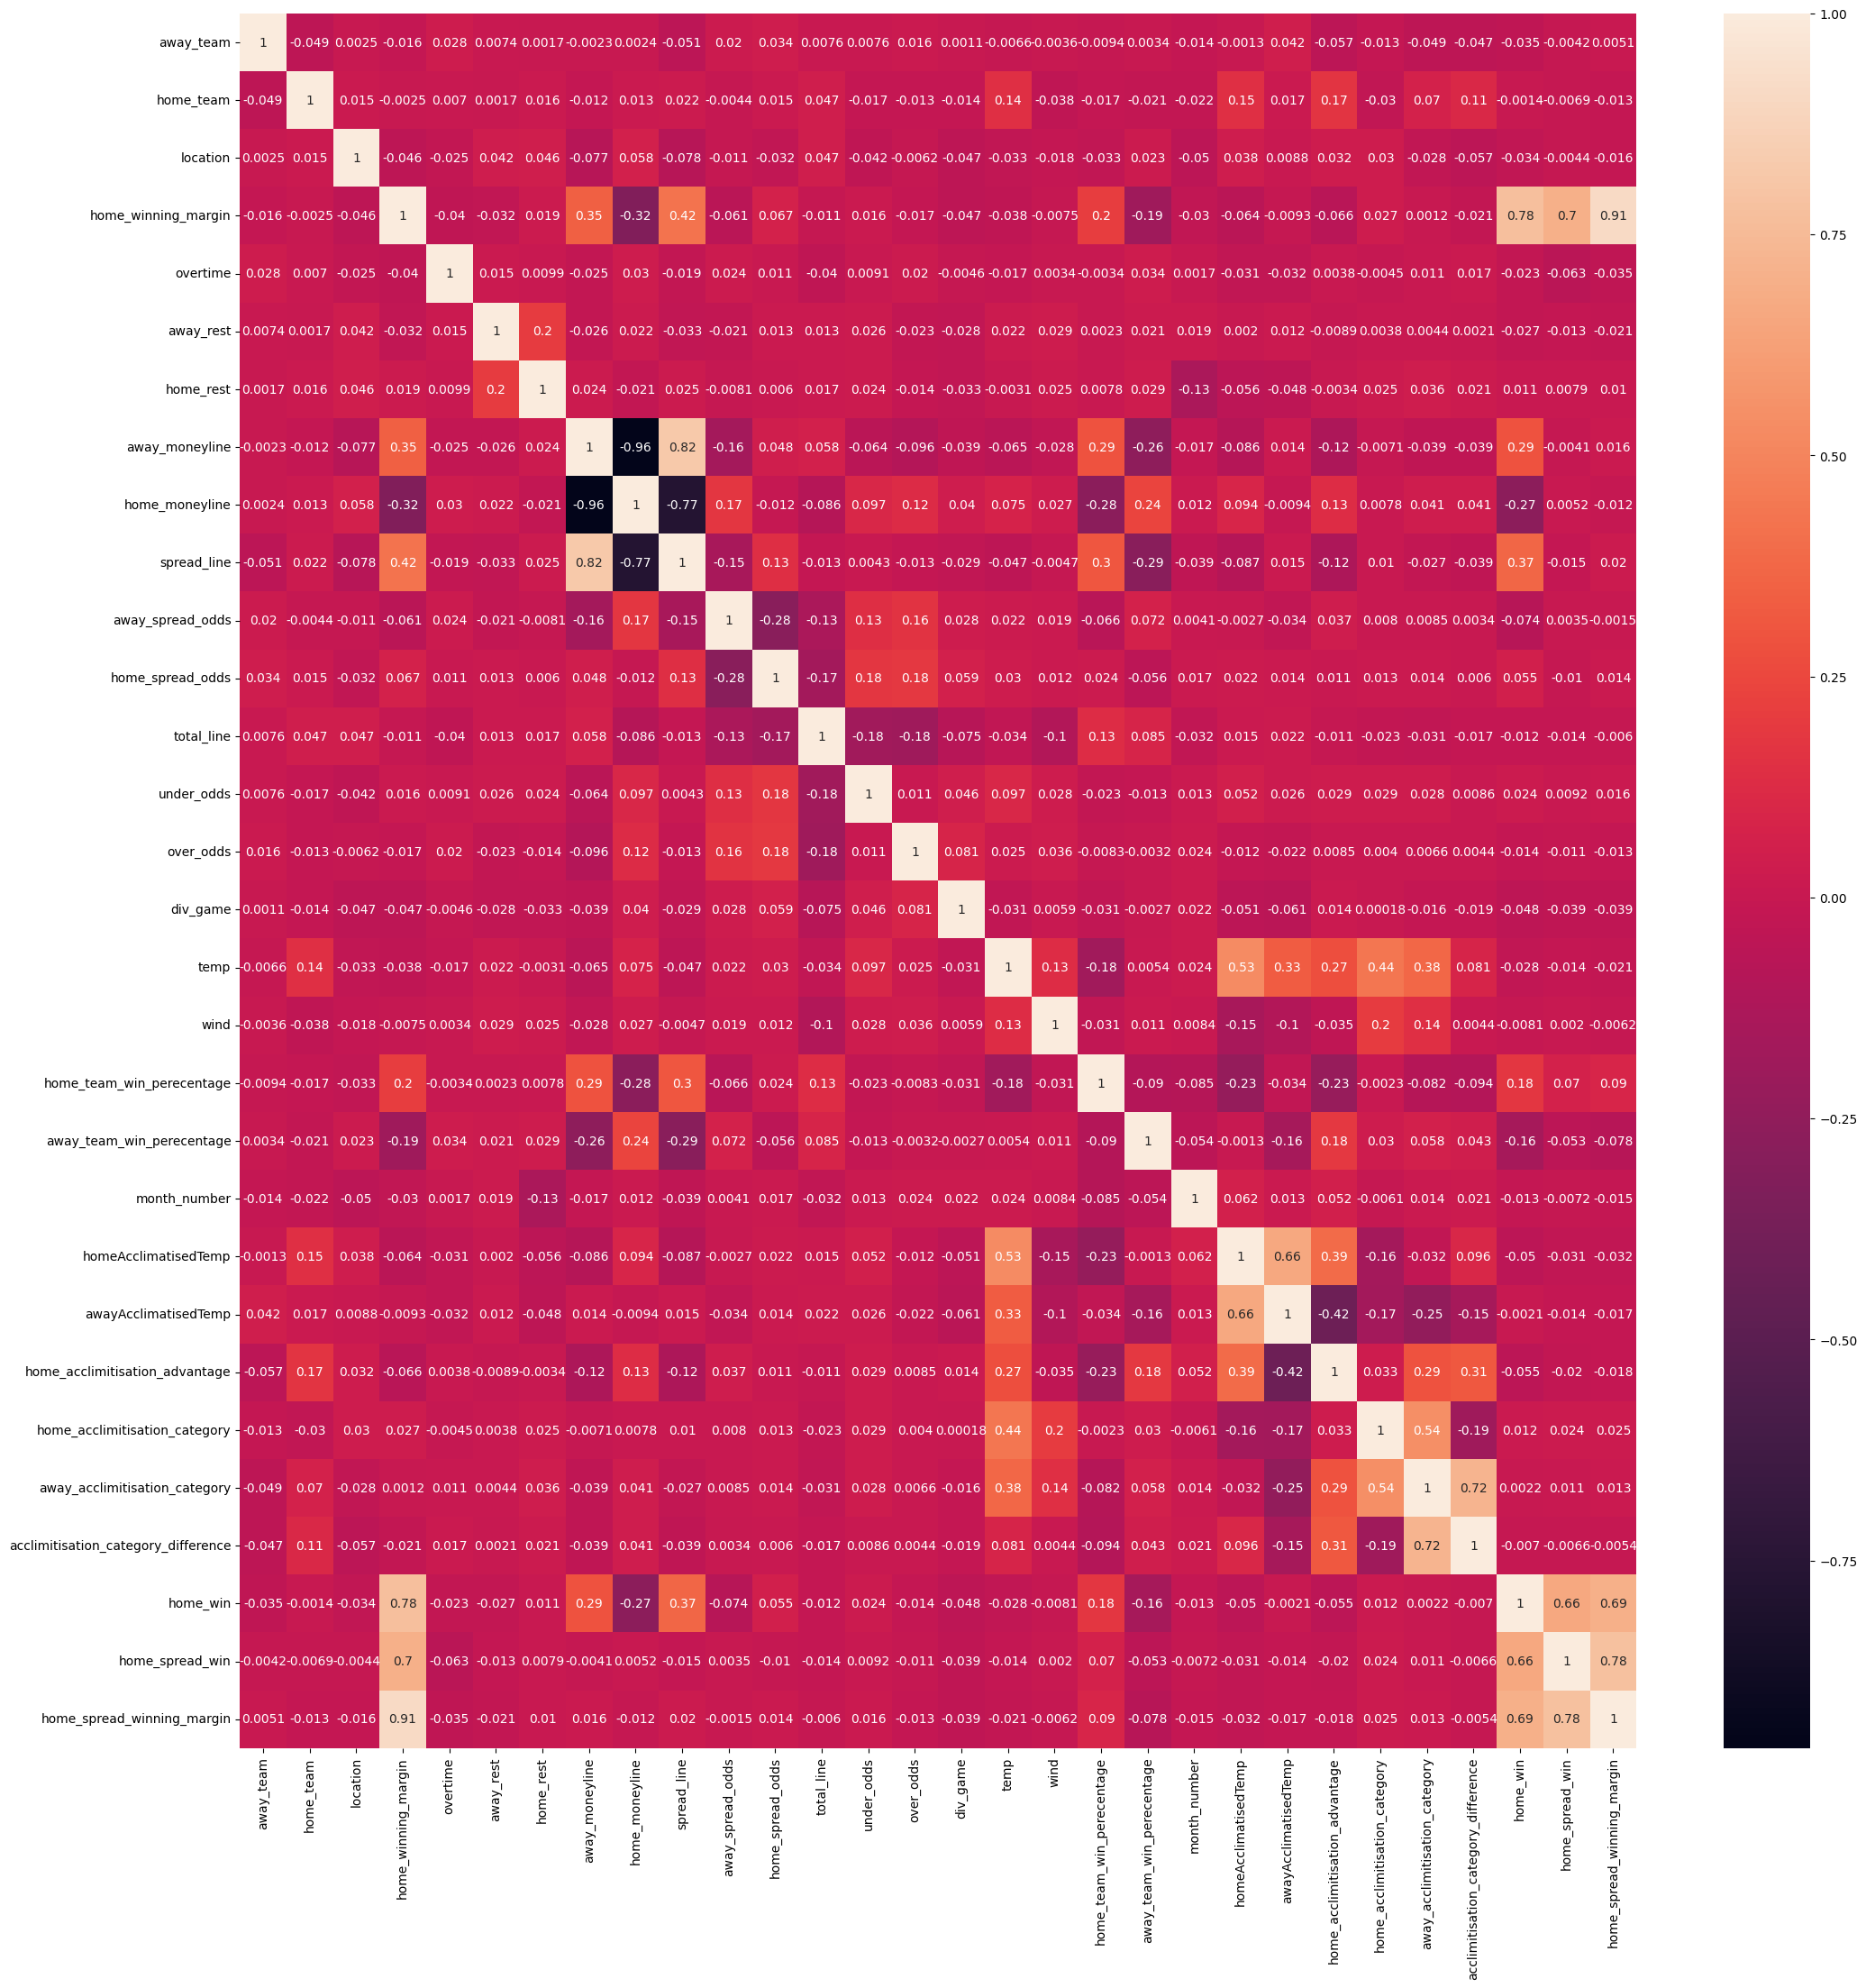

In [21]:
import seaborn as sn

corr_matrix = outdoor_with_acclimitisation_X_train.corr()

plt.figure(figsize=(25,25))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
indoor_y_train

3108    0
2626    1
1186    1
3249    0
3719    1
       ..
2118    0
2293    1
4484    0
1585    0
4754    1
Name: over_totals_win, Length: 1300, dtype: int32

In [23]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
943,7,15,0,-0.786573,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.525449,...,0.424244,48.395000,42.8300,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.095292
993,20,15,0,-0.226090,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.777646,...,0.770849,44.826957,22.1300,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.599246
6392,15,12,0,-1.417117,-0.264164,-0.715544,-0.694763,-1.927165,1.604161,-1.912454,...,-3.041804,57.027200,31.0208,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.675561
6567,23,4,0,2.085903,-0.264164,-0.214139,-0.224350,4.322940,-7.501471,2.543024,...,0.424244,59.712174,49.0550,0.0,0.0,0.0,0.0,0.889731,1.039551,1.117834
5726,30,15,0,0.824816,-0.264164,1.290078,-0.224350,1.100424,-1.103625,1.197974,...,0.424244,48.395000,53.6525,0.0,0.0,0.0,0.0,0.889731,1.039551,0.354687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,26,1,0,-0.646453,-0.264164,-0.214139,3.068535,-0.239180,0.341772,-1.408060,...,0.424244,52.145000,49.0550,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.065044
3613,3,8,0,0.334393,-0.264164,1.290078,-0.224350,0.258506,-0.151232,-0.063010,...,0.424244,42.350000,41.3375,0.0,0.0,0.0,0.0,0.889731,1.039551,0.392845
6514,14,15,0,-0.646453,-0.264164,-1.718355,-1.635587,0.275095,-0.210990,0.021055,...,0.077639,63.747500,70.2275,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.713719
4849,30,8,0,0.054151,3.785524,-0.214139,-0.224350,-0.670508,-0.054125,-0.567404,...,0.077639,56.307500,65.0000,0.0,0.0,0.0,0.0,0.889731,1.039551,0.316530


In [24]:
indoor_y_test

943     0
993     1
6392    0
6567    1
5726    0
       ..
1169    0
3613    0
6514    1
4849    1
4190    0
Name: over_totals_win, Length: 325, dtype: int32

In [25]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression(max_iter=1000)
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.5138461538461538


In [26]:
from sklearn.linear_model import LogisticRegression

outdoor_with_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_with_acclimitisation_model.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)
print(outdoor_with_acclimitisation_model.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test)) 

outdoor_with_acclimitisation_X_train

0.5299901671583087


,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_acclimitisation_category,away_acclimitisation_category,acclimitisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
1841,4,5,0,-0.706603,-0.252707,-0.247047,3.094312,-0.243212,0.324929,0.118359,...,-3.282777,-2.266854,-0.492827,-2.169864,0.802866,-0.728413,-1.527249,-1.144813,-0.946891,-0.834528
1433,15,30,0,0.040531,-0.252707,-0.247047,3.094312,-0.243212,0.324929,-0.887294,...,0.407769,0.446086,-0.593467,1.311112,0.802866,2.101149,1.821407,0.873505,1.056087,0.442493
1728,26,21,0,0.515980,-0.252707,-0.754423,-0.256846,-0.243212,0.324929,0.202163,...,0.407769,-0.286583,-0.288890,0.022256,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.480053
6463,4,27,0,0.515980,-0.252707,-0.754423,-0.256846,0.508679,-0.463085,0.453576,...,-0.330341,0.432841,1.580953,-1.439131,-0.544347,0.214774,0.705188,0.873505,1.056087,0.367375
628,29,32,0,0.719744,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,-0.803490,...,0.407769,-0.219832,-0.595641,0.490465,0.802866,1.157962,0.705188,0.873505,1.056087,1.156123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,3,14,0,-1.725422,-0.252707,-0.754423,-0.256846,-0.832532,0.797737,-0.887294,...,0.407769,-0.596290,-0.824992,0.313349,-0.544347,-0.728413,-0.411030,-1.144813,-0.946891,-1.510598
3705,13,2,0,0.855586,-0.252707,-0.247047,-0.256846,0.947621,-0.848337,0.872599,...,-3.282777,-1.355993,-1.765217,0.556137,0.802866,1.157962,0.705188,0.873505,1.056087,0.555172
1623,15,9,0,1.195193,-0.252707,0.260328,0.221890,-0.243212,0.324929,0.034554,...,-0.330341,1.188926,1.019844,0.201212,-0.544347,-0.728413,-0.411030,0.873505,1.056087,1.306361
4952,29,28,0,-0.910367,-0.252707,-0.754423,3.094312,-1.401530,1.207505,-1.557730,...,0.407769,0.038164,-0.595641,0.809468,0.802866,1.157962,0.705188,-1.144813,-0.946891,-0.308696


In [27]:
outdoor_without_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_without_acclimitisation_model.fit(outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_y_train)
print(outdoor_without_acclimitisation_model.score(outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_test)) 

0.5427728613569321


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimitisation_y_pred = outdoor_with_acclimitisation_model.predict(outdoor_with_acclimitisation_X_test)
outdoor_without_acclimitisation_y_pred = outdoor_without_acclimitisation_model.predict(outdoor_without_acclimitisation_X_test)

print(tabulate(
    [
        ['Indoor', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(recall_score(indoor_y_test, indoor_y_pred)*100, 1)], 

        ['Outdoor with acclimitisation', 
         round(accuracy_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1)],

        ['Outdoor without acclimitisation', 
         round(accuracy_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1)]

    ], headers=['Model', 'Accuracy score', 'F1 score', 'Precision score', 'Recall score'], tablefmt='grid'
))


+---------------------------------+------------------+------------+-------------------+----------------+
| Model                           |   Accuracy score |   F1 score |   Precision score |   Recall score |
+=================================+==================+============+===================+================+
| Indoor                          |             51.4 |       52.1 |              55.5 |           49.1 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor with acclimitisation    |             53   |       38.4 |              51.2 |           30.7 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor without acclimitisation |             54.3 |       43.9 |              54.5 |           36.8 |
+---------------------------------+------------------+------------+-------------------+----------------+


In [29]:
import random
for i in range(8):

    new_game = [[
        random.randint(1,32),#away_team
        random.randint(1,32),#home_team
        0,#location
        outdoor_df['home_winning_margin'].median(),#home_winning_margin
        0,#overtime
        7,#away_rest
        7,#home_rest
        outdoor_df['away_moneyline'].median(),#away_moneyline
        outdoor_df['home_moneyline'].median(),#home_moneyline
        outdoor_df['spread_line'].median(),#spread_line
        outdoor_df['away_spread_odds'].median(),#away_spread_odds
        outdoor_df['home_spread_odds'].median(),#home_spread_odds
        40,#outdoor_df['total_line'].mean(),#total_line
        outdoor_df['under_odds'].median(),#under_odds
        outdoor_df['over_odds'].median(),#over_odds
        outdoor_df['temp'].median(),#temp
        outdoor_df['wind'].median(),#wind
        random.randint(0,1),#div_game
        random.randint(0,1),#home_win
        random.randint(0,1),#home_spread_win
        4,#home_spread_winning_margin
        0.5,#home_team_win_perecentage
        0.5,#away_team_win_perecentage
        random.randrange(9,12),#month_number
        outdoor_df['homeAcclimatisedTemp'].median(),#homeAcclimatisedTemp
        outdoor_df['awayAcclimatisedTemp'].median(),#awayAcclimatisedTemp
        outdoor_df['home_acclimitisation_advantage'].median(),#home_acclimitisation_advantage
        1,#home_acclimitisation_category
        3,#away_acclimitisation_category
        outdoor_df['acclimitisation_category_difference'].median()#acclimitisation_category_difference
    ]]

    new_game_with_scaling = scaler.transform(new_game)
    prediction = outdoor_with_acclimitisation_model.predict(new_game_with_scaling)

    if prediction ==1:
        print("Over")
    else:
        print("Under")

print(new_game)

Under
Under
Under
Under
Under
Under
Under
Under
[[30, 4, 0, 0.04053086453183652, 0, 7, 7, -0.24321180185440555, 0.3249287884642962, 0.11835870745225174, -0.7791980974307714, -0.7853513256531737, 40, -0.7404856543197391, -0.7037624294553044, 0.13988420319245645, -0.019598881603102643, 0, 1, 1, 4, 0.5, 0.5, 10, 0.038164495206512314, 0.030478490509592282, 0.02225591495109759, 1, 3, -0.4110302817133311]]


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

In [30]:
from sklearn.naive_bayes import GaussianNB

gaussianModel = GaussianNB()
gaussianModel.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)
print(gaussianModel.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test))

0.5349065880039331


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)

print(knn.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test))

0.5260570304818093


In [32]:
# from sklearn import svm

# vector_clf = svm.SVC(kernel='linear') 

# vector_clf.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)

# print(vector_clf.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test))

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)

print(tree_clf.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test))

0.5339233038348082
